# Importing Packages 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [3]:
# Data preprocessing 
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
#  Check Imbalance data
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [13]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [15]:
ham = ham.sample(spam.shape[0])

In [16]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [17]:
# Balance dataset

data = ham.append(spam, ignore_index = True)
data.shape

(1494, 4)

In [19]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

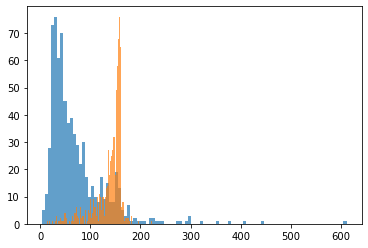

In [20]:
# vizualization by using ham and spam

plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

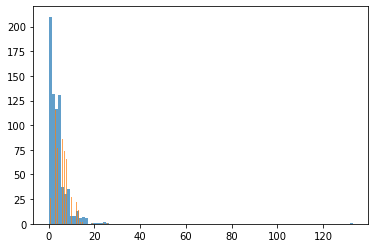

In [21]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [22]:
# split the data into training and test for building model

from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label']
                                                   , test_size=0.3, random_state= 102)

In [27]:
print(x_test.shape)
print(y_train.shape)

(449,)
(1045,)


In [32]:
# Build classification model
from sklearn.feature_extraction.text import TfidfVectorizer

# machine learning algorithm - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# pipeline package to merge nlp and machine learning together and get the output
from sklearn.pipeline import Pipeline

In [33]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=100))])

In [34]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [35]:
# predict the model by using test dataset

y_pred = classifier.predict(x_test)

In [36]:
y_test, y_pred

(717      ham
 473      ham
 403      ham
 624      ham
 1205    spam
         ... 
 452      ham
 1269    spam
 417      ham
 1373    spam
 1432    spam
 Name: label, Length: 449, dtype: object,
 array(['ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'sp

In [37]:
# Evaluation - confusion_matrix, classification_repot, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
print(confusion_matrix(y_test, y_pred))

[[231   2]
 [ 17 199]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       233
        spam       0.99      0.92      0.95       216

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [40]:
print(accuracy_score(y_test, y_pred))

0.9576837416481069
